# Data Mining (IME672)
# Name: Naman Verma, Vanshika Kulkarni
# Roll No.: 21105051, 1907545




### 1:  Importing Libraries and load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_excel("Dataset_Train.xlsx")

In [3]:
# shows count of rows and columns
dataset.shape

(22223, 11)

In [4]:
#shows first few rows of the code
dataset.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,8415498,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,12107603,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,14400995,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,28724674,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0


## Visualization for understanding Data

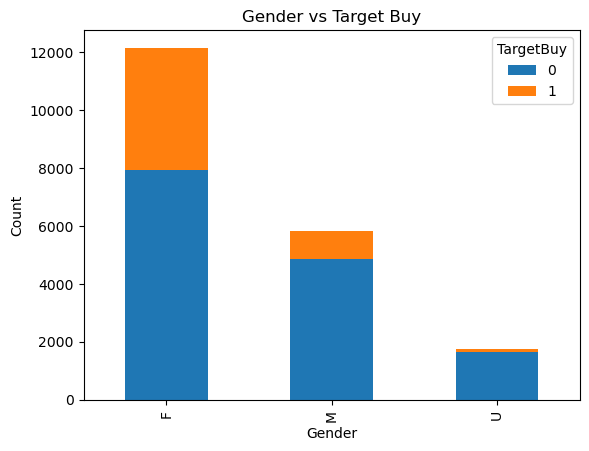

In [5]:
# Create a new DataFrame with counts of each gender/category combination
gender_counts = dataset.groupby(['DemGender', 'TargetBuy']).size().unstack()

# Plot the bar chart
ax = gender_counts.plot(kind='bar', stacked=True)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Gender vs Target Buy')

plt.show()

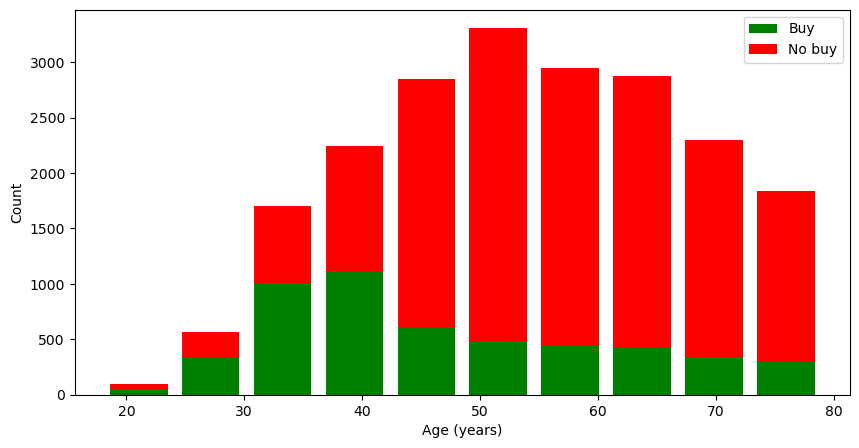

In [6]:
plt.figure(figsize=(10, 5))
plt.hist([dataset[dataset['TargetBuy'] == 1]['DemAge'], dataset[dataset['TargetBuy'] == 0]['DemAge']], 
         color=['green', 'red'], label=['Buy', 'No buy'],stacked=True, rwidth=0.8)
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend()
plt.show()

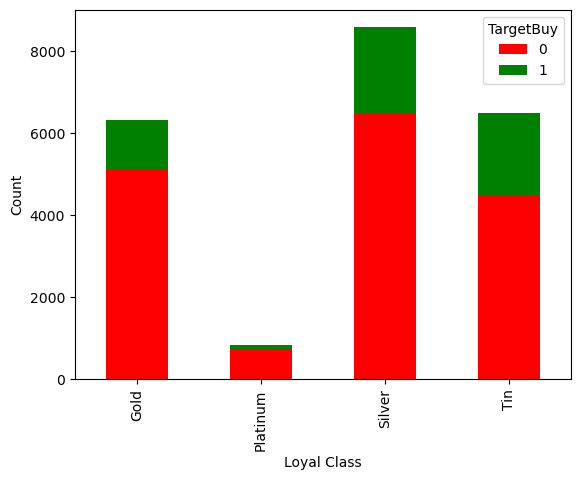

In [7]:
counts = dataset.groupby(['LoyalClass', 'TargetBuy']).size().unstack()

# Plot the stacked bar chart
counts.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.xlabel('Loyal Class')
plt.ylabel('Count')
plt.show()

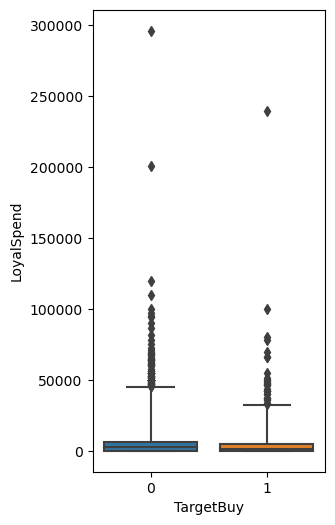

In [8]:
plt.figure(figsize=(3, 6))
sns.boxplot(x="TargetBuy", y="LoyalSpend", data=dataset,whis=(5, 99.5))
plt.xlabel("TargetBuy")
plt.ylabel("LoyalSpend")
plt.show()

In [9]:
# Calculate Q1 and Q3
Q1 = dataset['LoyalSpend'].quantile(0.05)
Q3 = dataset['LoyalSpend'].quantile(0.995)

# Identify outliers
outliers = dataset[(dataset['LoyalSpend'] < Q1) | (dataset['LoyalSpend'] > Q3)]
num_outliers = len(outliers)

# Remove outliers
dataset = dataset.drop(outliers.index)

# Print the number of outliers removed
print(f"Number of outliers: {num_outliers}")

Number of outliers: 112


In [ ]:
# create a scatter plot
sns.scatterplot(data=dataset, x="LoyalSpend", y="TargetBuy", hue="TargetBuy")

# set the axis labels
plt.xlabel("LoyalSpend")
plt.ylabel("TargetBuy")

# show the plot
plt.show()

### Data preparation

In [10]:
#dropping customer ID column from the dataset

dataset=dataset.drop(['ID'],axis=1)
dataset.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0


In [11]:
# explore missing values

dataset.isna().sum()

DemAffl            1083
DemAge             1503
DemClusterGroup     669
DemGender          2494
DemReg              465
DemTVReg            465
LoyalClass            0
LoyalSpend            0
LoyalTime           278
TargetBuy             0
dtype: int64

In [12]:
# filling missing values with mean/mode
dataset['DemAffl']=dataset['DemAffl'].fillna(dataset['DemAffl'].mode()[0])
dataset['DemAge']=dataset['DemAge'].fillna(dataset['DemAge'].mode()[0])
dataset['DemClusterGroup']=dataset['DemClusterGroup'].fillna(dataset['DemClusterGroup'].mode()[0])
dataset['DemGender']=dataset['DemGender'].fillna(dataset['DemGender'].mode()[0])
dataset['DemReg']=dataset['DemReg'].fillna(dataset['DemReg'].mode()[0])
dataset['DemTVReg']=dataset['DemTVReg'].fillna(dataset['DemTVReg'].mode()[0])
dataset['LoyalTime']=dataset['LoyalTime'].fillna(dataset['LoyalTime'].mean())

In [13]:
# explore missing values post missing value fix

dataset.isna().sum()

DemAffl            0
DemAge             0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
LoyalClass         0
LoyalSpend         0
LoyalTime          0
TargetBuy          0
dtype: int64

In [14]:
dataset.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,51.0,C,F,South East,London,Tin,0.01,5.000000,0
1,15.0,51.0,C,M,South East,London,Gold,8000.00,5.000000,1
2,8.0,51.0,C,M,Midlands,East,Tin,0.01,6.558879,1
3,8.0,28.0,C,F,South East,London,Tin,0.01,6.558879,1
4,14.0,67.0,C,F,South East,London,Tin,0.01,7.000000,0


### Coverting category to numeric

In [17]:
# converting to mumeric

from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

dataset['DemClusterGroup'] = number.fit_transform(dataset['DemClusterGroup'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

dataset['DemGender'] = number.fit_transform(dataset['DemGender'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

dataset['DemReg'] = number.fit_transform(dataset['DemReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

dataset['DemTVReg'] = number.fit_transform(dataset['DemTVReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

dataset['LoyalClass'] = number.fit_transform(dataset['LoyalClass'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'U': 6}
{'F': 0, 'M': 1, 'U': 2}
{'Midlands': 0, 'North': 1, 'Scottish': 2, 'South East': 3, 'South West': 4}
{'Border': 0, 'C Scotland': 1, 'East': 2, 'London': 3, 'Midlands': 4, 'N East': 5, 'N Scot': 6, 'N West': 7, 'S & S East': 8, 'S West': 9, 'Ulster': 10, 'Wales & West': 11, 'Yorkshire': 12}
{'Gold': 0, 'Platinum': 1, 'Silver': 2, 'Tin': 3}


In [18]:
dataset.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,51.0,2,0,3,3,3,0.01,5.000000,0
1,15.0,51.0,2,1,3,3,0,8000.00,5.000000,1
2,8.0,51.0,2,1,0,2,3,0.01,6.558879,1
3,8.0,28.0,2,0,3,3,3,0.01,6.558879,1
4,14.0,67.0,2,0,3,3,3,0.01,7.000000,0


### Checking for Multicollinearity

In [19]:
def calc_vif(z):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [20]:
z = dataset.iloc[:,0:9]
calc_vif(z)

,variables,VIF
0,DemAffl,6.325547
1,DemAge,11.565395
2,DemClusterGroup,3.674163
3,DemGender,1.436110
4,DemReg,2.482728
5,DemTVReg,3.758243
6,LoyalClass,4.698385
7,LoyalSpend,2.630675
8,LoyalTime,3.158428


In [21]:
dataset=dataset.drop(['DemAge'],axis=1)
dataset.head()

,DemAffl,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,2,0,3,3,3,0.01,5.000000,0
1,15.0,2,1,3,3,0,8000.00,5.000000,1
2,8.0,2,1,0,2,3,0.01,6.558879,1
3,8.0,2,0,3,3,3,0.01,6.558879,1
4,14.0,2,0,3,3,3,0.01,7.000000,0


### Sampling Unbalanced data

0    16624
1     5487
Name: TargetBuy, dtype: int64


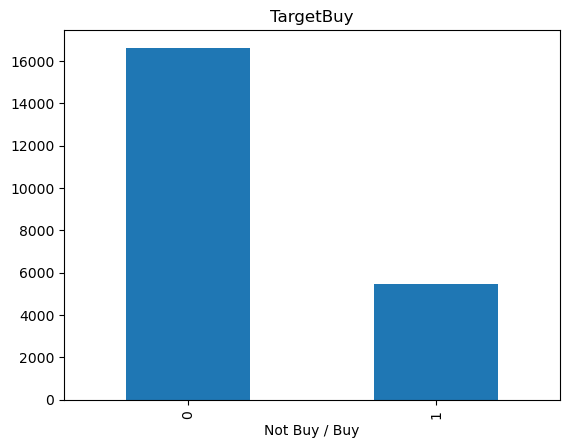

In [22]:
print(dataset['TargetBuy'].value_counts())
ax=dataset['TargetBuy'].value_counts().plot(kind='bar',title='TargetBuy')
ax.set_xlabel('Not Buy / Buy')
plt.show()

In [23]:
y = dataset.iloc[:, 8].values
X = dataset.iloc[:, 0:8].values

In [24]:
counter = Counter(y)
print('Before',counter)

# oversampling the train dataset using SMOTE

smote = SMOTE()
X_samp, y_samp = smote.fit_resample(X, y)

counter = Counter(y_samp)
print('After',counter)

Before Counter({0: 16624, 1: 5487})
After Counter({0: 16624, 1: 16624})


In [25]:
# splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.2, random_state=0)

### Modelling

In [26]:
classifier =  LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [27]:
# Exporting Logistic Regression Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'Classifier_LoyalCustomers')

['Classifier_LoyalCustomers']

In [28]:
print(confusion_matrix(y_test,y_pred))

[[2103 1237]
 [ 856 2454]]


In [29]:
print(accuracy_score(y_test, y_pred))

0.6852631578947368


In [30]:
predictions = classifier.predict_proba(X_test)
predictions

array([[0.10679822, 0.89320178],
       [0.23883996, 0.76116004],
       [0.1317319 , 0.8682681 ],
       ...,
       [0.19696437, 0.80303563],
       [0.63146868, 0.36853132],
       [0.40838445, 0.59161555]])

In [34]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])
df_x_test = pd.DataFrame(X_test)

dfx=pd.concat([df_x_test,df_test_dataset, df_prediction_prob], axis=1)

dfx.to_excel("ModelOutput_Train.xlsx")

dfx.head()

,0,1,2,3,4,5,6,7,Actual Outcome,prob_0,prob_1
0,18.349467,5.000000,0.0,3.349467,8.349467,3.0,0.01,7.41197,1,0.106798,0.893202
1,12.000000,4.983458,0.0,3.000000,3.000000,0.0,6000.00,2.00000,1,0.238840,0.761160
2,15.000000,5.000000,0.0,3.000000,3.000000,3.0,0.01,5.00000,1,0.131732,0.868268
3,11.000000,5.000000,0.0,4.000000,9.000000,0.0,6000.00,1.00000,1,0.355686,0.644314
4,15.000000,3.000000,0.0,1.000000,7.000000,2.0,1000.00,2.00000,0,0.129617,0.870383
